In [20]:
import pathlib
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import os


import SessionTools.two_photon as st2p


%load_ext autoreload
%autoreload 2 

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
session_info = {'date': "04_12_2024",
                'genotype_dir': 'R20A02_R56H10_split_GRABOA1',
                'fly': 'fly1',
                'session': 'closed_loop-001',
                'fictrac_scan_num':1,
                'fictrac_dat_file' :'fictrac-20241204_084624.dat',
                'full_genotype': '+/w-; +/UAS-GRABOA1.0; R20A02-AD,R45H10-DBD/UAS-GRABOA1.0',
                'ecl date': '11/29/2024',
                'notes': ''}


In [30]:
gd = session_info['genotype_dir']
d = session_info['date']
f = session_info['fly']
s = session_info['session']
outdir = pathlib.PurePath(f'/media/mplitt/SSD_storage/2P_scratch/{gd}/{d}/{f}/{s}/preprocess.pkl')
pp = st2p.preprocessing.EBImagingSession.from_file(outdir)

y = pp.timeseries['rois_z']
n_rois=y.shape[1]

In [31]:
y_sm = sp.ndimage.gaussian_filter1d(sp.ndimage.gaussian_filter1d(y, 2, axis=-1),.7,axis=1, mode='wrap')
x_f,y_f = st2p.utilities.pol2cart(y_sm[-1,:,:],np.linspace(-np.pi,np.pi,num=n_rois)[:,np.newaxis])
rho,phi = st2p.utilities.cart2pol(x_f.mean(axis=0), y_f.mean(axis=0))
print(rho.shape, phi.shape)

heading = -1* pp.voltage_recording_aligned[' Heading'].to_numpy()

_,offset = st2p.utilities.cart2pol(*st2p.utilities.pol2cart(np.ones(heading.shape),phi-heading))

(3457,) (3457,)


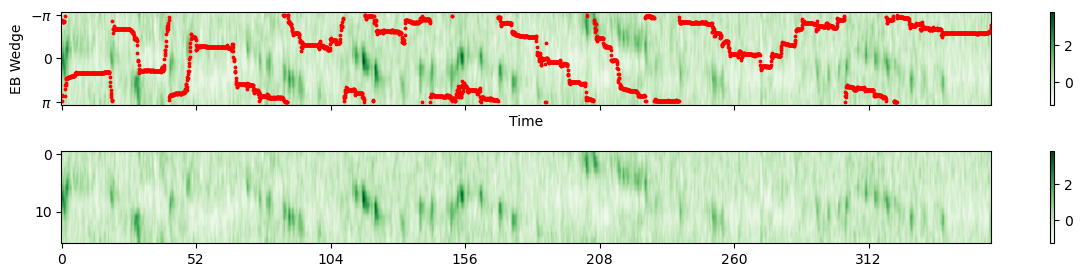

In [38]:
fig, ax= plt.subplots(2,1,figsize=[15,3], sharex=True)
h = ax[0].imshow(y_sm[-1,::-1,:], aspect='auto', cmap= 'Greens') #, vmin=-1,vmax=1)#, vmin=-1,vmax=1)

t = np.arange(y.shape[-1])
ax[0].scatter(t, 15-15*(heading+np.pi)/2/np.pi, c='red', s=3)
ax[0].set_ylabel('EB Wedge')
ax[0].set_xlabel('Time')


time = np.array(pp.metadata['frame_times']).mean(axis=-1)
_ = ax[0].set_xticks(t[::500],labels=[int(_t) for _t in time[::500]])
_ = ax[0].set_yticks([0, 7.5, 15], labels=[r'$-\pi$', 0, r'$\pi$'])

ax[1].imshow(y_sm[-1,::-1,:], aspect='auto', cmap= 'Greens')

fig.subplots_adjust(hspace=.5)

figdir = pathlib.PurePath(f'/media/mplitt/SSD_storage/fig_scratch/{gd}')
os.makedirs(figdir,exist_ok=True)
fig.colorbar(h,ax =ax[0])
fig.colorbar(h,ax=ax[1])
fig.savefig(figdir / f"{d}_{f}_{s}_heatmap.pdf")

In [39]:
session_info = {'date': "26_11_2024",
                'genotype_dir': 'R20A02_R56H10_split_GRABDA2m',
                'fly': 'fly2',
                'session': 'closed_loop-000',
                'fictrac_scan_num':0,
                'fictrac_dat_file' :'', #'fictrac-20241204_084624.dat',
                'full_genotype': '', #'+/w-; +/UAS-GRABOA1.0; R20A02-AD,R45H10-DBD/UAS-GRABOA1.0',
                'ecl date': '', #'11/29/2024',
                'notes': ''}

gd = session_info['genotype_dir']
d = session_info['date']
f = session_info['fly']
s = session_info['session']
outdir = pathlib.PurePath(f'/media/mplitt/SSD_storage/2P_scratch/{gd}/{d}/{f}/{s}/preprocess.pkl')
pp = st2p.preprocessing.EBImagingSession.from_file(outdir)

y = pp.timeseries['rois_z']
n_rois=y.shape[1]

In [40]:
y_sm = sp.ndimage.gaussian_filter1d(sp.ndimage.gaussian_filter1d(y, 2, axis=-1),.7,axis=1, mode='wrap')
x_f,y_f = st2p.utilities.pol2cart(y_sm[-1,:,:],np.linspace(-np.pi,np.pi,num=n_rois)[:,np.newaxis])
rho,phi = st2p.utilities.cart2pol(x_f.mean(axis=0), y_f.mean(axis=0))
print(rho.shape, phi.shape)

heading = -1* pp.voltage_recording_aligned[' Heading'].to_numpy()

_,offset = st2p.utilities.cart2pol(*st2p.utilities.pol2cart(np.ones(heading.shape),phi-heading))

(3399,) (3399,)


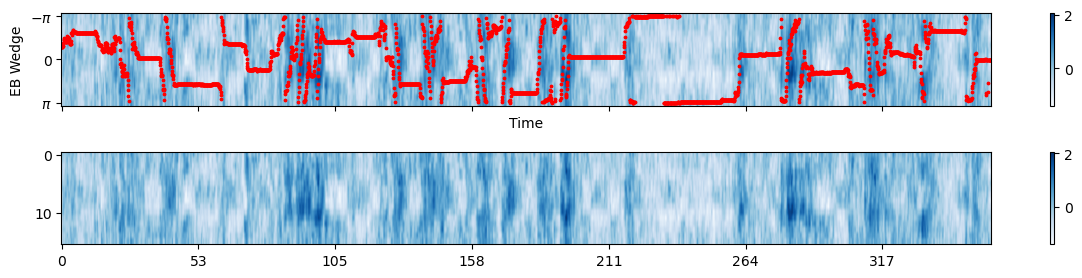

In [43]:
fig, ax= plt.subplots(2,1,figsize=[15,3], sharex=True)
h = ax[0].imshow(y_sm[-1,::-1,:], aspect='auto', cmap= 'Blues') #, vmin=-1,vmax=1)#, vmin=-1,vmax=1)

t = np.arange(y.shape[-1])
ax[0].scatter(t, 15-15*(heading+np.pi)/2/np.pi, c='red', s=3)
ax[0].set_ylabel('EB Wedge')
ax[0].set_xlabel('Time')


time = np.array(pp.metadata['frame_times']).mean(axis=-1)
_ = ax[0].set_xticks(t[::500],labels=[int(_t) for _t in time[::500]])
_ = ax[0].set_yticks([0, 7.5, 15], labels=[r'$-\pi$', 0, r'$\pi$'])

ax[1].imshow(y_sm[-1,::-1,:], aspect='auto', cmap= 'Blues')

fig.subplots_adjust(hspace=.5)

figdir = pathlib.PurePath(f'/media/mplitt/SSD_storage/fig_scratch/{gd}')
os.makedirs(figdir,exist_ok=True)
fig.colorbar(h,ax =ax[0])
fig.colorbar(h,ax=ax[1])
fig.savefig(figdir / f"{d}_{f}_{s}_heatmap.pdf")